# Критерии Стьюдента

In [25]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats import weightstats

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.    

Требуется оценить эффект применения препарата.    

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [8]:
data = pd.read_csv('./data/ADHD.txt', sep=' ', header=0)

In [9]:
data.head(2)

,D0,D60
0,57,62
1,27,49


In [10]:
data.columns = ['Placebo', 'Methylphenidate']

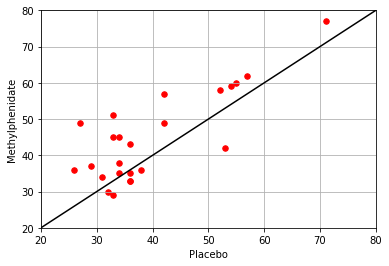

In [14]:
data.plot.scatter('Placebo', 'Methylphenidate', c='r', s=30)
pylab.grid()
pylab.plot(range(100), c='black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

Большинство точек лежит выше прямой. Это может означать, что препарат работает.   

Построим гистаграммы.

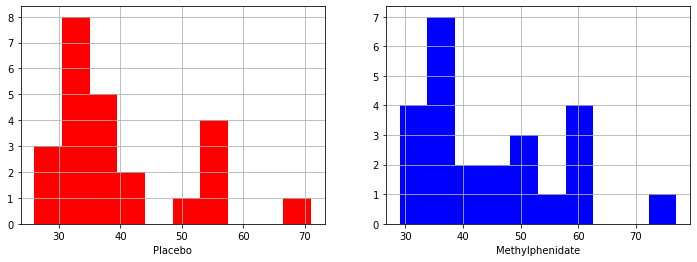

In [16]:
pylab.figure(figsize(12, 4))

pylab.subplot(1, 2, 1)
pylab.grid()
pylab.hist(data['Placebo'], color='r')
pylab.xlabel('Placebo')

pylab.subplot(1, 2, 2)
pylab.grid()
pylab.hist(data['Methylphenidate'], color='b')
pylab.xlabel('Methylphenidate')

pylab.show()

Минимальное и максимальное значение на правом графике больше. Это тоже может означать, что препарат работает.  
Но надо строго проверить наши предположения.

## Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.  
$H_1\colon$ не равно.

In [17]:
# Пациенты до применения 
scipy.stats.ttest_1samp(data['Placebo'], 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

Это позволяет отвергнуть нулевую гипотезу и сказать, что среднее не равно 50.   

Оценим интервально.

In [19]:
print(f"Conf inerval: [{weightstats.zconfint(data['Placebo'])}]")

Conf inerval: [(35.223272709859756, 44.276727290140244)]


## Двухвыборочный критерий Стьюдента (независимые выборки)

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

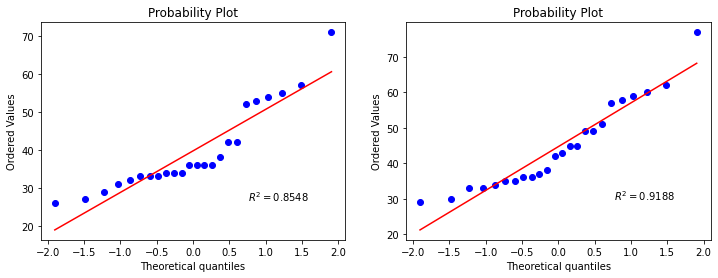

In [28]:
# Построим ку-ку плот

pylab.figure(figsize=(12, 4))

pylab.subplot(1, 2, 1)
weightstats.stats.probplot(data['Placebo'], dist='norm', plot=pylab, rvalue=True)

pylab.subplot(1, 2, 2)
weightstats.stats.probplot(data['Methylphenidate'], dist='norm', plot=pylab, rvalue=True)

pylab.show()

Из графиков видно, что точки не очень далеко расположены от прямой, поэтому будем считать, что данные распределены нормально. Проверим это более строго.

### Критерий Шапиро-Уилка:

$H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально    
     
$H_1\colon$ не нормально.    

In [29]:
placebo_w_test = weightstats.stats.shapiro(data['Placebo'])
print(f"Shapiro normality test, W-stat: {placebo_w_test[0]}, p-value: {placebo_w_test[1]}")

Shapiro normality test, W-stat: 0.8574873208999634, p-value: 0.00302018690854311


In [30]:
methylphenidate_w_test = weightstats.stats.shapiro(data['Methylphenidate'])
print(f"Shapiro normality test, W-stat: {methylphenidate_w_test[0]}, p-value: {methylphenidate_w_test[1]}")

Shapiro normality test, W-stat: 0.9164453148841858, p-value: 0.04876822605729103


Значения p-value получаются довольно маленькими, а значит нам придется отвергнуть нулевую гипотезу о том, что данные распределены нормально.   
Но из рисунков видно, что распределение от нормального отличается, но не очень сильно. Критерий Стьюдента работает в условиях, когда распредлеение не является нормальным, но существенно от него не отличается.

Поэтому все же попробуем применить критерий Стьюдента. Проверим гипотезу о равенстве средних двух выборок.  

### Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.   

$H_1\colon$ не одинаковы.

In [32]:
scipy.stats.ttest_ind(data['Placebo'], data['Methylphenidate'], equal_var=False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

p-value достаточно большое, поэтому мы не можем отвергнуть нулевую гипотезу о равенстве средних.   

Интервально оценим разность средних по этим двум выборкам.

In [33]:
cm = weightstats.CompareMeans(weightstats.DescrStatsW(data['Methylphenidate']), weightstats.DescrStatsW(data['Placebo']))
print(f"Conf interval: {cm.tconfint_diff(alpha=0.05)}")

Conf interval: (-1.9145892502382829, 11.831255916904954)


Фактически, среднее больше, чем ноль, но ноль все же лежит в доверительном интервале.

## Двухвыборочный критерий Стьюдента (зависмые выборки)

Мы знаем, что исследование проводилось таким образом, что один и тот же пациент принимал и плацебо, и лекарство. Поэтому у нас выборка получилась связанной.  

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

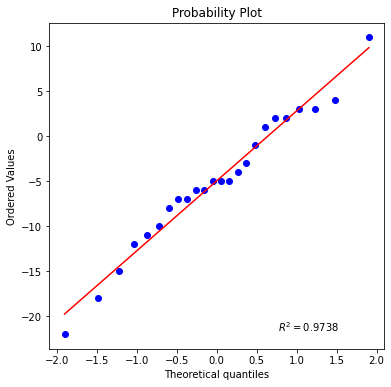

In [36]:
pylab.figure(figsize=(6, 6))
weightstats.stats.probplot(data['Placebo'] - data['Methylphenidate'], dist='norm', plot=pylab, rvalue=True)
pylab.show()

Распределение очень похоже на нормальное.

### Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [37]:
diff_w_test = weightstats.stats.shapiro(data['Placebo'] - data['Methylphenidate'])
print(f"Shapiro normality test, W-stat: {diff_w_test[0]}, p-value: {diff_w_test[1]}")

Shapiro normality test, W-stat: 0.9798052906990051, p-value: 0.8922504186630249


p-value получтлось довольно большое, поэтому нулевую гипотезу о нормальном распределении отвергать нельзя.

### Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [38]:
weightstats.stats.ttest_rel(data['Methylphenidate'], data['Placebo'])

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [39]:
print(f"95%% confidence interval: {weightstats.DescrStatsW(data['Methylphenidate'] - data['Placebo']).tconfint_mean()}")

95%% confidence interval: (1.7752357893192365, 8.14143087734743)


p-value довольно маленькое, поэтому нулевую гипотезу о равенстве средних мы можем отвергнуть и прийти к выводу, что способности к подавлению испульсивных поведенческих реакций не одинаковы.  
Доверительный интервал разности лежит правее нуля, что тоже говорит о том, что нулевую гипотезу можно отвергнуть.